In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Načítanie dát zo súborov
file_paths = {
    "GPT True Results": "vysledky_analyzy_gpt_true.csv",
    "Gemini Results": "vysledky_analyzy_gemini.csv",
    "Gemini True Results": "vysledky_analyzy_gemini_true.csv",
    "GPT Results": "vysledky_analyzy_gpt.csv",
}

# Načítanie datasetov do slovníka
dataframes = {name: pd.read_csv(path) for name, path in file_paths.items()}

# Normalizácia názvov nástrojov (malé písmená a odstránenie medzier)
for df in dataframes.values():
    df["nastroj"] = df["nastroj"].str.lower().str.strip()

# Výpočet priemerného času vykonania pre každý nástroj naprieč všetkými datasetmi
avg_time_overall = (
    pd.concat([df.groupby("nastroj")["cas_vykonania"].mean().reset_index() for df in dataframes.values()])
    .groupby("nastroj")["cas_vykonania"].mean()
    .reset_index()
)

# Výpočet celkového počtu detegovaných chýb pre každý nástroj naprieč všetkými datasetmi
total_errors_overall = (
    pd.concat([df.groupby("nastroj")["pocet_chyb"].sum().reset_index() for df in dataframes.values()])
    .groupby("nastroj")["pocet_chyb"].sum()
    .reset_index()
)

# Zoradenie dát pre lepšiu vizualizáciu
avg_time_overall = avg_time_overall.sort_values("nastroj")
total_errors_overall = total_errors_overall.sort_values("nastroj")

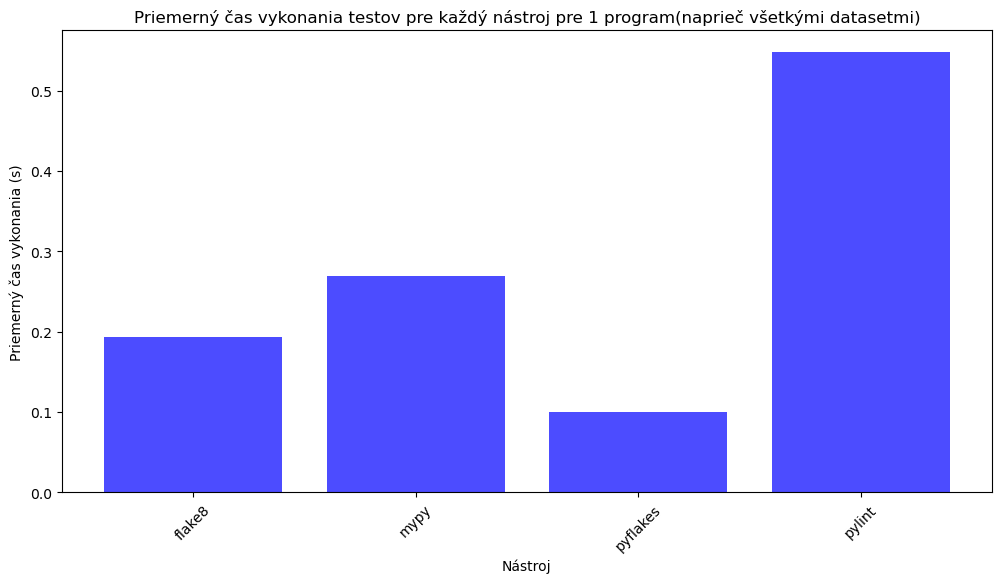

In [35]:
# Graf 1: Priemerný čas vykonania pre každý nástroj
plt.figure(figsize=(12, 6))
plt.bar(avg_time_overall["nastroj"], avg_time_overall["cas_vykonania"], color="blue", alpha=0.7)
plt.xlabel("Nástroj")
plt.ylabel("Priemerný čas vykonania (s)")
plt.title("Priemerný čas vykonania testov pre každý nástroj pre 1 program(naprieč všetkými datasetmi)")
plt.xticks(rotation=45)
plt.show()

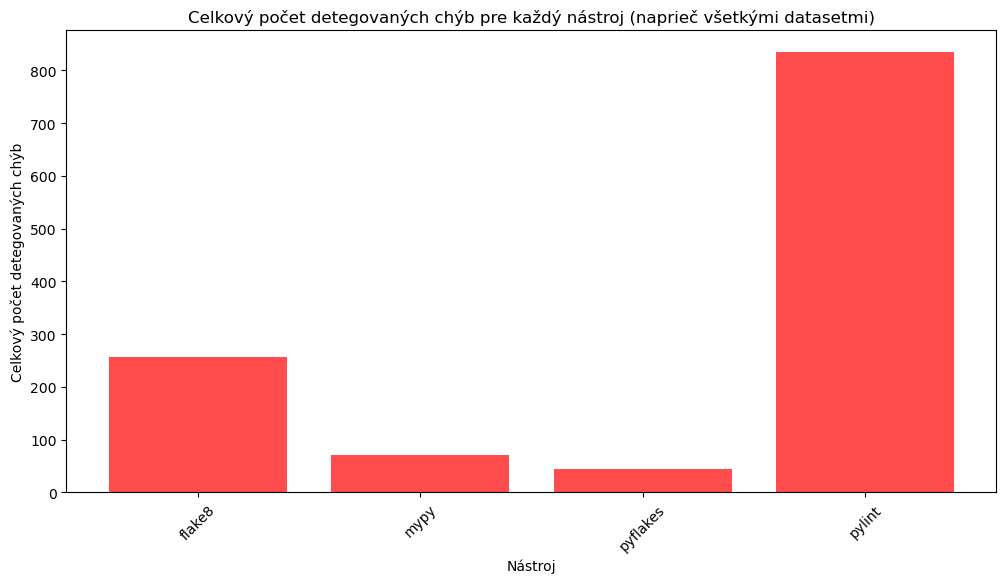

In [17]:
# Graf 2: Celkový počet detegovaných chýb pre každý nástroj
plt.figure(figsize=(12, 6))
plt.bar(total_errors_overall["nastroj"], total_errors_overall["pocet_chyb"], color="red", alpha=0.7)
plt.xlabel("Nástroj")
plt.ylabel("Celkový počet detegovaných chýb")
plt.title("Celkový počet detegovaných chýb pre každý nástroj (naprieč všetkými datasetmi)")
plt.xticks(rotation=45)
plt.show()

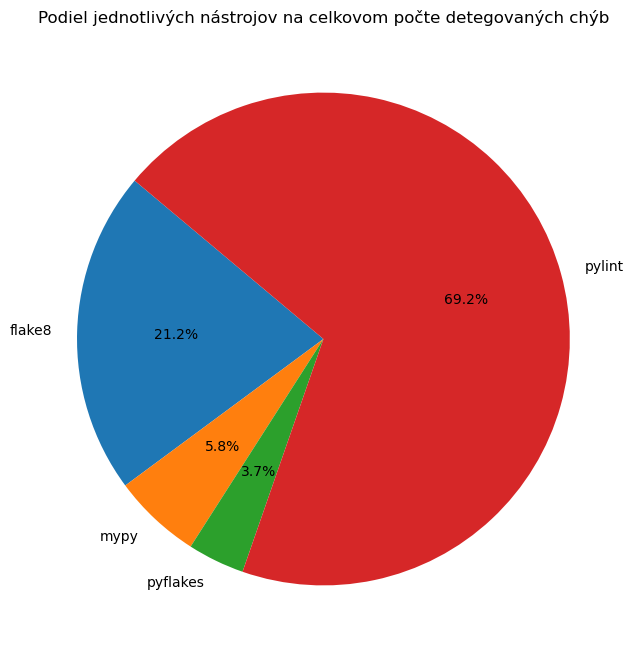

In [21]:
# Výpočet celkového počtu detegovaných chýb
total_errors_pie = total_errors_overall.set_index("nastroj")["pocet_chyb"]

# Vytvorenie pie chartu
plt.figure(figsize=(8, 8))
plt.pie(total_errors_pie, labels=total_errors_pie.index, autopct="%1.1f%%", startangle=140)
plt.title("Podiel jednotlivých nástrojov na celkovom počte detegovaných chýb")
plt.show()

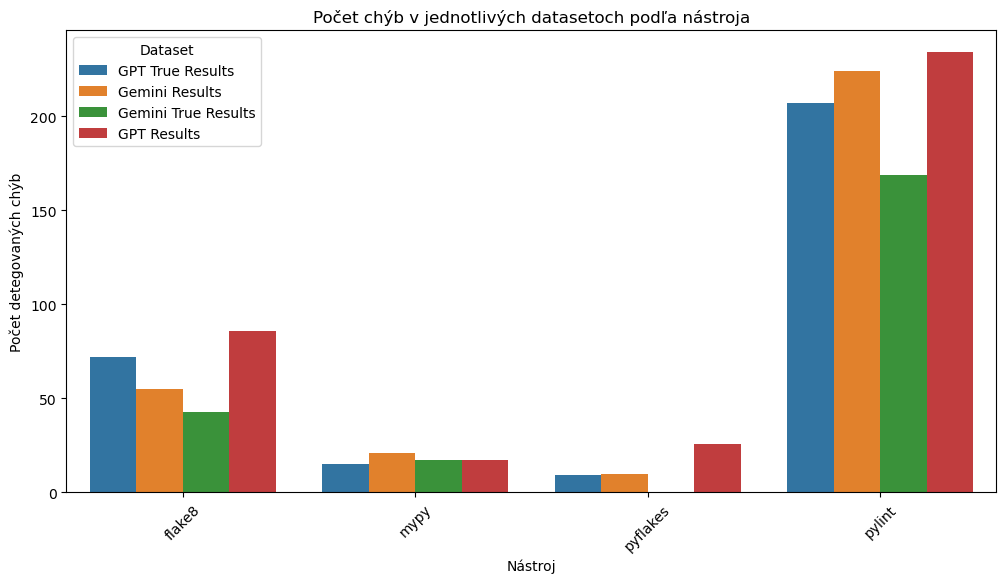

In [23]:
# Výpočet počtu chýb pre jednotlivé datasetové skupiny
dataset_errors = pd.concat(
    [df.groupby("nastroj")["pocet_chyb"].sum().reset_index().assign(dataset=name) for name, df in dataframes.items()]
)

# Vykreslenie bar chartu
plt.figure(figsize=(12, 6))
sns.barplot(x="nastroj", y="pocet_chyb", hue="dataset", data=dataset_errors)
plt.xlabel("Nástroj")
plt.ylabel("Počet detegovaných chýb")
plt.title("Počet chýb v jednotlivých datasetoch podľa nástroja")
plt.xticks(rotation=45)
plt.legend(title="Dataset")
plt.show()

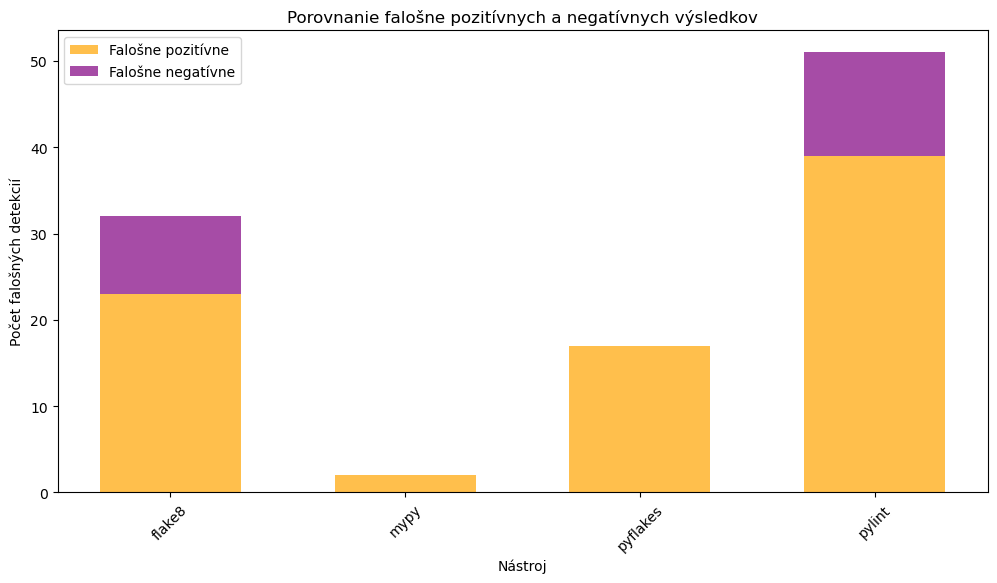

In [29]:
import numpy as np

# Nastavenie veľkosti grafu
plt.figure(figsize=(12, 6))

# Stacked bar chart pre FP a FN
bar_width = 0.6
index = np.arange(len(false_values["nastroj"]))

plt.bar(index, false_values["false_positives"], bar_width, label="Falošne pozitívne", color="orange", alpha=0.7)
plt.bar(index, false_values["false_negatives"], bar_width, bottom=false_values["false_positives"], label="Falošne negatívne", color="purple", alpha=0.7)

plt.xlabel("Nástroj")
plt.ylabel("Počet falošných detekcií")
plt.title("Porovnanie falošne pozitívnych a negatívnych výsledkov")
plt.xticks(index, false_values["nastroj"], rotation=45)
plt.legend()
plt.show()


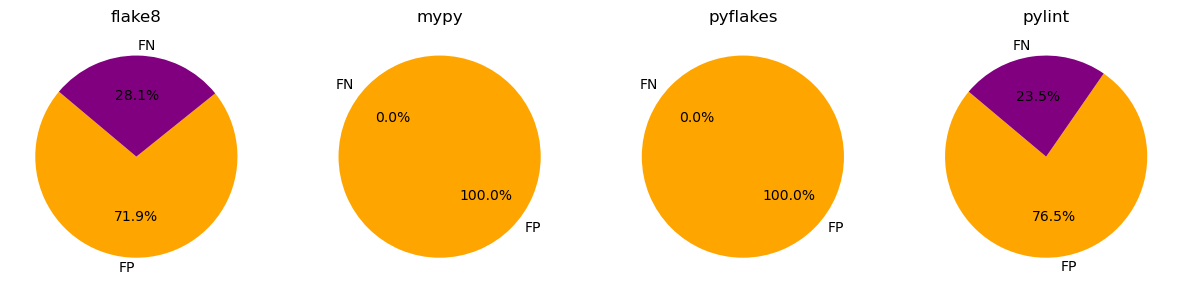

In [31]:
# Výpočet percentuálneho podielu FP a FN
false_values["fp_percent"] = false_values["false_positives"] / (false_values["false_positives"] + false_values["false_negatives"]) * 100
false_values["fn_percent"] = false_values["false_negatives"] / (false_values["false_positives"] + false_values["false_negatives"]) * 100

# Vykreslenie pie chartu pre každý nástroj
fig, axes = plt.subplots(1, len(false_values), figsize=(15, 6))

for i, row in false_values.iterrows():
    axes[i].pie([row["fp_percent"], row["fn_percent"]], labels=["FP", "FN"], autopct="%1.1f%%", startangle=140, colors=["orange", "purple"])
    axes[i].set_title(row["nastroj"])

plt.show()


In [33]:
df_mypy_true = df_true[df_true["nastroj"] == "mypy"]
df_mypy_test = df_test[df_test["nastroj"] == "mypy"]

print("Výstup Mypy v True datasete:")
print(df_mypy_true[["subor", "pocet_chyb", "vystup"]].head())

print("\nVýstup Mypy v Test datasete:")
print(df_mypy_test[["subor", "pocet_chyb", "vystup"]].head())


Výstup Mypy v True datasete:
    subor  pocet_chyb                                       vystup
3   01.py           1  Success: no issues found in 1 source file\n
7   02.py           1  Success: no issues found in 1 source file\n
11  03.py           1  Success: no issues found in 1 source file\n
15  04.py           1  Success: no issues found in 1 source file\n
19  05.py           1  Success: no issues found in 1 source file\n

Výstup Mypy v Test datasete:
    subor  pocet_chyb                                             vystup
3   01.py           1        Success: no issues found in 1 source file\n
7   02.py           1        Success: no issues found in 1 source file\n
11  03.py           1        Success: no issues found in 1 source file\n
15  04.py           2  gpt/04.py:8: error: invalid syntax  [syntax]\n...
19  05.py           1        Success: no issues found in 1 source file\n
